**Student name and BC username**

NAME HERE

BC USERNAME HERE

**Collaborators names and BC usernames (max 2 collaborators)**

+ NAME 1 

+ NAME 2

# <font face = "times"><center>  EC1151 - Homework 8 - Due Nov 4th, 3PM</font> 

<font face="times">
# Instructions
<br>

+ You must fill out this Jupyter notebook and return it by e-mail to baisihad@bc.edu

+ Double click on the cells to edit them

+ For questions that need mathematical notation, try to use $\LaTeX$ if you can.

+ Sometimes, below a question that requires an answer there will be a cell with several `assert` statements. If you can run that cell without generating error, your answer has been validated and you are guaranteed the points.

+ If you're stuck, try posting a question in the Piazza forum. Active contributors will be rewarded.

+ Finally, this is <b>experimental</b>. I'd love to hear what you think about this homework format. You can e-mail me with your thoughts, or (preferrably) post in the Piazza forum (possibly anonymously to your peers).


---

I'll import all the libraries you may need ahead.

In [42]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

---

## Basic concepts [5 points]

**Q1)** Check whether the following statements are True or False, and explain why. 

a) If the total area of our rejection region is $\alpha$%, then the probability of a Type 1 error is also $\alpha$%.

b) Suppose we want to estimate the true mean $\mu$ given our data. Since it could be anywhere on the real line, we say it is random. A *95% confidence interval* is the region where the true but random $\mu$ falls 95% of the time.

c) When testing a hypothesis, if the *p-value* is higher than our *significance level*, we say that the null hypothesis is true.

d) Confidence intervals get wider as the significance level $\alpha$ decreases.

---

## Variable transformations [15 points]

**Q2)** Prove this fact from the lecture slides:

$$X \sim Uniform(0,1) \qquad \implies \qquad Z = -\log(X) \sim Exponential(1)$$

Recall that, if $X \sim Uniform(0,1)$

$$F_X(x) = \begin{cases}0 \quad \text{if  } \ x < 0 \\
x \quad \text{if  } \ 0 \leq x < 1 \\
1 \quad \text{if  } \ 1 \leq x 
\end{cases}$$

$$f_X(x) = \begin{cases}
1 \quad \text{if  } \ 0 \leq x < 1 \\
0 \quad \text{otherwise} 
\end{cases}$$


While if $Z \sim Exponential(1)$, then

$$F_Z(z) = 1 - e^{-z}$$

$$f_Z(z) = e^{-z}$$

---

## Trump + CLT [20 points]

**Q3)** Imagine that in a poll of 1000 registered voters, 521 said they'd vote for Donald Trump, so the estimate of the fraction of pro-Trump voters is $\hat{p} = 0.521$. Let's test

$$H_0: p = .5 \qquad \qquad H_1: p \neq .5$$

at a significance level $\alpha = .05$. 

When answering the following questions, assume throughout that $H_0$ is true.

a) Denote each survey answer by $X_i$. What is the distribution of each $X_i$ under $H_0$?

b) What are the values of $E[X_i]$ and $Var[X_i]$, assuming $H_0$ is true?

c) *According to the Central Limit Theorem*, we have that

$$\hat{p} \sim Normal(?, ?)$$

Answer what are the values of "?".

d) At $\alpha = 0.1$, what are the rejection regions associated with $H_0$?

e) Find a 90% confidence interval around the estimate $\hat{p}$ using the CLT.

---

## "Z-tests" (Normal with known mean) [20 points]

**Q4)** The length of a certain machined part is supposed to be 10 centimeters. In fact, due to imperfections in the manufacturing process, the actual length is a random variable. The standard deviation is due to inherent factors in the process, which remain fairly stable over time. From historical data, the standard deviation is known with a high degree of accuracy to be $\sigma = 0.3$. The mean $\mu$, on the other hand, may be set by adjusting various parameters in the process and hence may change to an unknown value fairly frequently. Suppose that a sample of 100 parts has mean $\hat{\mu} = 10.1$. We are interested in testing 

$$H_0: \mu = 10 \qquad H_1: \mu \neq 10$$

a) Begin by computing the "Z-statistic":

$$\hat{z} = \frac{\hat{\mu} - \mu_{hyp}}{\sqrt{\frac{\sigma^2}{n}}}$$

b) Use the CLT and what you learned about normalization to give the approximate distribution of $\hat{Z}$, assuming $H_0$.

c) Use the distribution of $\hat{Z}$ to find the appropriate width for a 95% confidence interval.

d) What is the 95% confidence interval around the estimate $\hat{z} = 10.1$? 

e) Would you reject $H_0$ based on your test?

---

## "t-tests" (Normal with unknown mean) [20 points]

**Q5)** The setup is the same as above, except that we will relax the assumption that we know $\sigma$.

We will work with the **t-statistic**.

$$\hat{T} = \frac{\hat{\mu} - \mu_{hyp}}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \sim t_{n-1}$$

Under $H_0$, the distribution of $\hat{T}$ is the **Student-t distribution with n-1 *degrees of freedom***. We cannot use the Normal distribution because we are not using the true variance $\sigma^2$, but and estimate of it. This introduces some unwanted randomness, and ends up polluting the distribution.


In Python, you can query anything about this distribution using the object

```python
ss.t(df = n - 1)  #  "n" is sample size, and df stands for "degrees of freedom".
```
Examples:
```python
ss.t(df = 99).cdf(2)  # Value of F(2), where F is cdf, assuming sample size is n = 100
ss.t(df = 49).pdf(0)  # Value of f(2), where f is pdf, assuming sample size is n = 50
ss.t(df = 99).ppf(.025)  # Value of F^{-1}(alpha/2), with n = 100 and alpha = 5%
```





Remark: The expression **degrees of freedom** carries little meaning. Whenever you encounter it in the context of hypothesis testing, just think of it as something like "adjusted sample size".

a) Compute the value of $\hat{t}$ assuming that you have estimates $\hat{\mu} = 10.1$ and $\hat{\sigma} = 0.35$.

In [53]:
muhat = 10.1
muhyp = 10
sigmahat = 0.35
n = 100
that = (10.1 - 10)/np.sqrt(sigmahat**2/n)

b) Use the Student-t distribution, as above, to find the rejection regions for $\alpha = 0.1$.

In [102]:
lower = ss.t(df = 99).ppf(0.025)
upper = ss.t(df = 99).ppf(0.975) 

c) Does $\hat{t}$ fall inside or outside the rejection region? Given this information, should we reject $H_0$ at $\alpha = 0.1$?

d) Suppose that you forgot all about the Student-t distribution, treated $\hat{\sigma}$ as if it were the true $\sigma$ and used $Normal(0,1)$ instead of $t_{n-1}$. Would your rejection region have been much different? How does your answer change when $n$ is very small versus $n$ very large? (See more about this in the last section of the homework).



---

## **$\chi^2$ tests** [20 points]

**Q6)** Recall that a **$\chi^2$ test** is a test where the statistic of interest follows a $\chi^2$ distribution. 

Let's suppose that given $n = 50$ observations, we have computed $\hat{\sigma}^2 = 7$. We would like to test:

$$H_0: \sigma^2 \leq 6 \qquad H_1: \sigma^2 > 6$$

It turns out that the $\chi^2$-statistic, denoted by $\hat{W}$ below, follows a $\chi^2_{n-1}$ distribution under the null hypothesis. (this is read as "chi-squared with n-1 degrees of freedom"). 
$$$$

$$\hat{W} = \frac{n}{\sigma^2}\hat{\sigma}^2 \sim \chi^2_{n-1}$$

Just like in the $t$-distribution case above, querying anything about this distribution is easy.

```python
ss.chi2(df = n - 1)  #  "n" is sample size, and df stands for "degrees of freedom".
```
Examples:
```python
ss.chi2(df = 99).cdf(2)  # Value of F(2), where F is cdf, assuming sample size is n = 100
ss.chi2(df = 49).pdf(0)  # Value of f(2), where f is pdf, assuming sample size is n = 50
ss.chi2(df = 99).ppf(.9)  # Value of F^{-1}(1 - alpha), with n = 100 and alpha = 10%
```


a) Compute the value of the $\chi^2$ statistic $\hat{w}$ given the information in the problem.

In [124]:
sigmasqhat = 7
sigmasqhyp = 6
n = 500
what = (n/sigmasqhyp)*sigmasqhat
print(what)

583.3333333333333


b) Compute the rejection region for the $\chi^2_{n-1}$ distribution at the $\alpha = 0.1$ level. (Note this is a one-tailed test).

In [125]:
alpha = .1
lower = ss.chi2(df = n-1).ppf(1 - alpha)
print(lower) # Lower boundary of the rejection region. Upper boundary is infinity.

539.889737476


c) Does $\hat{w}$ fall inside or outside the rejection region? Do you reject $H_0$ based on this answer?

Outside. No.

d) Would your answer to part "c" change if $n$ were $500$ instead? Give an intuitive explanation for why or why not.

---

# Extra (15 points)

**Q7)** If you wanted to plot the pdf of the $Normal(0,1)$, for example, you could do the following.

```python
x = np.linspace(start = -4, stop = 4, num = 1000) # 1000 equally-spaced pts in [-4, 4]
fx = ss.norm(0,1).pdf(x)  # computes the pdf at the 1000 pts above
fig, ax = plt.subplots(1)  # creates a plotting window
ax.plot(x, fx)  # plots it
```

This should be the result.

<img src="norm.png">

Your challenge is to look into the plotting library `matplotlib` <a href="http://matplotlib.org/index.html">documentation</a>, or gather any other resources you may find, and reproduce the following figure to the best of your ability.

<img src="norm_t.png">

**Remark** This should show you that the $t_{n}$ distribution converges to the $Normal(0, 1)$ distribution as $n$ grows large.

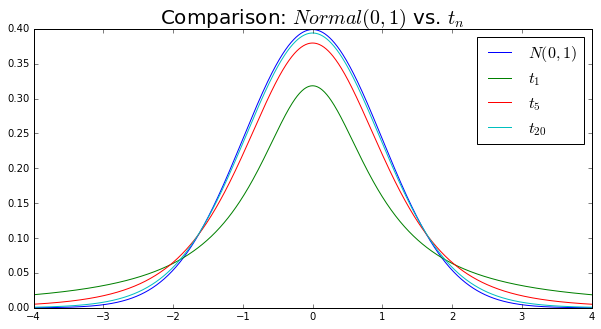

In [100]:
x = np.linspace(start = -4, stop = 4, num = 1000) # 1000 equally-spaced pts in [-4, 4]
fx_norm = ss.norm(0,1).pdf(x)  # computes the pdf at the 1000 pts above
fx_t2 = ss.t(df = 1).pdf(x) 
fx_t10 = ss.t(5).pdf(x) 
fx_t100 = ss.t(20).pdf(x) 

fig, ax = plt.subplots(1, figsize = (10, 5))  # creates a plotting window
ax.plot(x, fx_norm, label = "$N(0,1)$")  # plots it
ax.plot(x, fx_t2, label = "$t_{1}$")  # plots it
ax.plot(x, fx_t10, label = "$t_{5}$")  # plots it
ax.plot(x, fx_t100, label = "$t_{20}$")  # plots it
ax.legend(fontsize = 16)
ax.set_title("Comparison: $Normal(0,1)$ vs. $t_{n}$", fontsize = 20)
fig.savefig("norm_t")